**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2021</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 02, 2022 17:00 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "hakansivuk@gmail.com".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) Why do people use validation data?<br>

   While verifying data inputs and values is important, it is also necessary to validate the training model itself. If the training data model is not structured or built correctly, you will run into issues when 

  >b) What is the difference between mean squared error and mean absolute error?  <br>
   
   MAD is the average of the absolute errors. MSE is the average of the squared errors

  >c) What is the main problem of using sigmoid as activation function in an artificial neural network (ANN)?<br>
It is better to use sigmoid in multi-class classification. It produces better results than for multi-class classification

>d) What does it mean to overfit your data model?<br>
Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data.

  >e) Your input image size is 3x64x64. If you apply 3x3 convolution with input_channel=3, output_channel=6, padding=0, stride=2, what would be the size of the output?<br>
  64 - 3 + 2(0) / 2 + 1 = 32x32

  >f) In the previous question, how many trainable parameters are there? (you should also consider bias terms in addition to weights)
<br>
5




##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify scenes according to their contexts by using simple machine learning algorithms developed for CV problems on scene images.

Your dataset consist of scene images from 4 contexts. Images of each context is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 2500 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1l51t3aTY7B131fwq92ACI_b_D5Idq5In/view?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import os
import cv2
import random

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.

Mounted at /content/drive


### Data Loader [6 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "SceneDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of SceneDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [ ]:
class SceneDataset(Dataset): # TODO:
# Define constructor for SceneDataset class

# HINT: You can pass processed 
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.astype('float')).cuda()
        self.y = torch.FloatTensor(y.astype('float')).cuda()
        #self.n_samples = X.shape[0]
    
    def __len__(self):
        return self.X.shape[0]


    def __getitem__(self, index):
        return self.X[index,:], self.y[index]

In [ ]:
!unzip '/content/drive/MyDrive/HW3_data/data.zip' -d '/content/drive/MyDrive/data'
#root = '/content/gdrive/MyDrive/HW3_data/data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/data/data/sea/6400.jpg  
  inflating: /content/drive/MyDrive/data/__MACOSX/data/sea/._6400.jpg  
  inflating: /content/drive/MyDrive/data/data/sea/15259.jpg  
  inflating: /content/drive/MyDrive/data/__MACOSX/data/sea/._15259.jpg  
  inflating: /content/drive/MyDrive/data/data/sea/17328.jpg  
  inflating: /content/drive/MyDrive/data/__MACOSX/data/sea/._17328.jpg  
  inflating: /content/drive/MyDrive/data/data/sea/22393.jpg  
  inflating: /content/drive/MyDrive/data/__MACOSX/data/sea/._22393.jpg  
  inflating: /content/drive/MyDrive/data/data/sea/7078.jpg  
  inflating: /content/drive/MyDrive/data/__MACOSX/data/sea/._7078.jpg  
  inflating: /content/drive/MyDrive/data/data/sea/14635.jpg  
  inflating: /content/drive/MyDrive/data/__MACOSX/data/sea/._14635.jpg  
  inflating: /content/drive/MyDrive/data/data/sea/19311.jpg  
  inflating: /content/drive/MyDrive/data/__MACOSX/data/sea/._19311.jpg  
  inflat

In [ ]:
def get_dataset(path_to_dataset_file):
    
    IMG_SIZE = 90
    temp_array = []
    img_array = []
    label_array = []
    
    DATADIR = path_to_dataset_file
    CATEGORIES = ["forest", "glacier", "mountain", "sea"]
    
    #i = -1
    #for folders in os.listdir(DATADIR):
  
       # i = i + 1
        
        #for filename in os.listdir(DATADIR+"/"+folders):
            #img = cv2.imread(os.path.join(DATADIR+"/"+folders, filename))
            #if img is not None:                          
              #  img_array.append(img)  
               # label_array.append(i) 

    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to forest, mountain, etc
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try_array = cv2.imread(os.path.join(path, img))
            #new_array = cv2.resize(temp_array, (IMG_SIZE, IMG_SIZE))
            temp_array.append([try_array, class_num])
    
    #random.shuffle(temp_array)
    
    for features, label in temp_array:
        img_array.append(features)
        label_array.append(label)
        
    img_array = np.array(img_array)
    label_array = np.array(label_array)
    
    max_in_image = np.max(img_array)
    img_array = np.divide(img_array, max_in_image)
    
    
     #for normalization
    
    
    X, X_test, y, y_test = train_test_split(img_array, label_array, test_size = 0.20)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.125)
    
    X_train = X_train.reshape( len(X_train), 3, 90, 90)
    X_test = X_test.reshape( len(X_test), 3, 90, 90)
    X_valid = X_valid.reshape( len(X_valid), 3, 90, 90)

    train_dataset = SceneDataset(X_train, y_train)
    vald_dataset = SceneDataset(X_valid, y_valid)
    test_dataset = SceneDataset(X_test, y_test)

    return train_dataset, vald_dataset, test_dataset

###Model Implementation [7 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 4 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU </li>
    <li>(3) 8 filters with size of 3 x 3 with stride 1 and padding 1, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 16 filters with size of 3 x 3 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, **kwargs): 
    # you can add any additional parameters you want 
      super(ConvNet, self).__init__()
      self.cc1 = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(3,3), stride=1, padding=1)
      self.cc2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(3,3), stride=1, padding=1)
      self.cc3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=1, padding=1)
      self.fc1 = nn.Linear(7744, 4)
      #self.dropout1 = nn.Dropout(0.5)
      self.relu = nn.ReLU(inplace = True)
      self.dropout = nn.Dropout()
      self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
      self.to(self.device)
      
   
    # TODO:
    # You should create your neural network here
    def forward(self, x): # you can add any additional parameters you want # TODO:
    #   x = self.convs(x)
    #   x = x.view(-1, self._to_linear)
    #   x = F.relu(self.fc1(x))
    #   x = self.fc2(x)
    
      x = self.cc1(x)
      x = self.relu(x)
      x = self.cc2(x)
      x = self.relu(x)
      x = F.max_pool2d(x, 2, 2)
      x = self.cc3(x)
      x = self.relu(x)
      x = F.max_pool2d(x, 2, 2)
      x = x.reshape(x.size(0), -1)
      x = self.fc1(x)
      #x = self.dropout1(x)
      x = x.log_softmax(dim = 1)
      return x
     # output = F.log_softmax(x, dim=1)  
     # return output  
    # Forward propagation implementation should be here

###Stochastic Gradient Descent [25 pts.]

####Training with SGD [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Streaming output truncated to the last 5000 lines.
Epoch: [281][21/219]	Loss 1.2824 (1.3119)	Accu 56.2500 (49.2560)	
Epoch: [281][22/219]	Loss 1.3240 (1.3125)	Accu 50.0000 (49.2898)	
Epoch: [281][23/219]	Loss 1.3599 (1.3145)	Accu 40.6250 (48.9130)	
Epoch: [281][24/219]	Loss 1.2892 (1.3135)	Accu 50.0000 (48.9583)	
Epoch: [281][25/219]	Loss 1.2861 (1.3124)	Accu 56.2500 (49.2500)	
Epoch: [281][26/219]	Loss 1.3464 (1.3137)	Accu 31.2500 (48.5577)	
Epoch: [281][27/219]	Loss 1.2992 (1.3132)	Accu 50.0000 (48.6111)	
Epoch: [281][28/219]	Loss 1.2868 (1.3122)	Accu 59.3750 (48.9955)	
Epoch: [281][29/219]	Loss 1.2764 (1.3110)	Accu 59.3750 (49.3534)	
Epoch: [281][30/219]	Loss 1.3064 (1.3108)	Accu 46.8750 (49.2708)	
Epoch: [281][31/219]	Loss 1.3177 (1.3111)	Accu 46.8750 (49.1935)	
Epoch: [281][32/219]	Loss 1.3335 (1.3118)	Accu 40.6250 (48.9258)	
Epoch: [281][33/219]	Loss 1.2991 (1.3114)	Accu 50.0000 (48.9583)	
Epoch: [281][34/219]	Loss 1.3135 (1.3114)	Accu 43.7500 (48.8051)	
Epoch: [281][35/219]	Loss

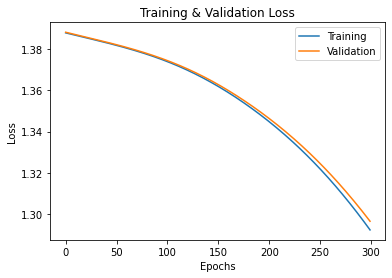

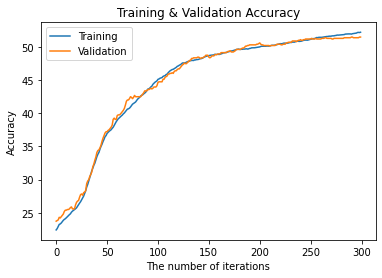

In [ ]:


# Hyperparameters
max_epoch = 300
train_batch = 32
test_batch = 32
validate_batch = 32
learning_rates = [0.01]
use_gpu = torch.cuda.is_available()
 

train_dataset, vald_dataset, test_dataset = get_dataset("/content/drive/MyDrive/data/data")

print(len(train_dataset))
print(len(vald_dataset))
print(len(test_dataset))


#train_dataset = SceneDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle = True)
 
# Create validation dataset loader
#vald_dataset = SceneDataset(X_valid, y_valid)
vald_loader = DataLoader(vald_dataset, batch_size=train_batch)
 
# Create test dataset loader
#test_dataset = SceneDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=test_batch)

def train(model, criterion, optimizer, dataset, epoch):
  modelToTry = model
  modelToTry = model.train()
  train_loss, averageLoss, train_acc, avgerageAcc, counter = 0

  for index, (data, labels) in enumerate(dataset):
    
    optimizer.zero_grad()
    predicted_label = model.forward(data)
    loss = criterion(predicted_label, labels.long())
    loss.backward()
    #optimize 
    optimizer.step()
    predictions = ((np.argmax(predicted_label.cpu().detach().numpy(), axis=-1)).astype(int)).flatten()
    train_acc = np.mean(predictions == labels.cpu().detach().numpy()) * 100
    train_loss = loss.item()
    avgerageAcc += train_acc
    averageLoss += train_loss
    print('Epoch: [{0}][{1}/{2}]\t'
          'Loss {loss_val:.4f} ({loss_avg:.4f})\t'
          'Accu {acc_val:.4f} ({acc_avg:.4f})\t'.format(
            epoch + 1, index + 1, len(dataset), 
            loss_val=curr_loss, loss_avg=averageLoss/counter, acc_val=train_acc, acc_avg=avgerageAcc/counter))
    counter += 1
    
  return averageLoss/counter, avgerageAcc/counter

def validate(model, criterion, dataset):
  model = model.eval()
  curr_loss = 0
  avgLoss = 0
  curr_acc = 0
  avgAcc = 0
  count = 0
  with torch.no_grad():
    for -lesr, (data, labels) in enumerate(dataset):
      count += 1
      predicted_label = model.forward(data)
      loss = criterion(predicted_label, labels.long())
      predictions = ((np.argmax(predicted_label.cpu().detach().numpy(), axis=-1)).astype(int)).flatten()
      curr_acc = np.mean(predictions == labels.cpu().detach().numpy()) * 100
      curr_loss = loss.item()
      avgAcc += curr_acc
      avgLoss += curr_loss
      print('Loss {loss_val:.4f} ({loss_avg:.4f})\t'
            'Accu {acc_val:.4f} ({acc_avg:.4f})\t'.format(
              loss_val=curr_loss, loss_avg=avgLoss/count, acc_val=curr_acc, acc_avg=avgAcc/count))
    
  return avgLoss/count, avgAcc/count

best_loss = float('inf')
best_model = None
all_loss_train, all_acc_train, all_loss_val, all_acc_val = [], [], [], []
best_lr = None

# Training and Validation
for lr in learning_rates:
  # Create Model
  model = ConvNet() 
  criterion = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=5e-04)

  # Train model
  for epoch in range(max_epoch): 
    losses, accuracies = train(model, criterion, optimizer, train_loader, epoch)
    if (lr == 0.00001): # only values for best learning rate
      all_loss_train.append(losses)
      all_acc_train.append(accuracies)
  
    # Validate model 
    with torch.no_grad():
      loss, acc = validate(model, criterion, vald_loader)
      if (lr == 0.00001): # only values for best learning rate
        all_loss_val.append(loss)
        all_acc_val.append(acc)    
      if (loss < best_loss):
        best_loss = loss
        #torch.save(model, f'/content/drive/My Drive/best_mlp.pth')
        best_model = model
        best_lr = lr


print(best_lr)
# Plotting 
x_axis = np.arange(max_epoch)
plt.plot(x_axis, all_loss_train, label='Training')
plt.plot(x_axis, all_loss_val, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(x_axis, all_acc_train, label='Training')
plt.plot(x_axis, all_acc_val, label='Validation')
plt.xlabel('The number of iterations')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:



max_epoch = 300
train_batch = 32
test_batch = 32
validate_batch = 32
learning_rates = [0.00001] #chage from here 
use_gpu = torch.cuda.is_available()
 


train_dataset, vald_dataset, test_dataset = get_dataset("/content/drive/MyDrive/data/data")

print(len(train_dataset))
print(len(vald_dataset))
print(len(test_dataset))


#train_dataset = SceneDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle = True)
 
# Create validation dataset loader
#vald_dataset = SceneDataset(X_valid, y_valid)
vald_loader = DataLoader(vald_dataset, batch_size=train_batch)
 
# Create test dataset loader
#test_dataset = SceneDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=test_batch)

use_gpu = torch.cuda.is_available()
# initialize your network

RuntimeError: ignored

In [ ]:
# HINT: note that your training time should not take more than 2 hours.

 
#use_gpu = torch.cuda.is_available()


# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader

# initialize your network
model = ConvNet()
#num_features = model.fc.in_features

if use_gpu:
  model.cuda()
# model.fc = replace its output layer with a linear layer (in_features, proper number according to your output classes)

# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rates[0], weight_decay=1e-4)

# start training
# for each epoch calculate validation performance
# save best model according to validation performance

l_loss = 0
Train_loss=[]
Valid_loss=[]
Train_accuracy=[]
Valid_accuracy=[]

check_for = 0
for epoch in range(max_epoch):
  model= model.train()
  temp = 0
  loss_count = np.zeros(train_dataset.__len__())
  preds = []
  sys_check = []
  for index, (data, labels) in enumerate(train_loader):
    if use_gpu:
      data = data.cuda()
      labels = labels.cuda()
    optimizer.zero_grad()
    y_pred = model(data.float())
    predicted = np.array((y_pred).cpu().detach())
    for x in predicted:
      preds.append(np.argmax(x))
 
    loss  = criterion(y_pred, labels.long())
    
    loss.backward()
    optimizer.step()
    
    real_pred = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    w_update = 0
    n_update = 0
    for _ in y_pred:     
      if real_pred[w_update] == np.argmax(predicted[w_update]):
        n_update += 1
      w_update += 1
    accuracies = n_update/w_update
    losses = np.mean(np.array(loss.cpu().detach()))
    
    
    for x in real_pred:
      sys_check.append(x)
    
    loss_count[temp*train_batch:(temp+1)*train_batch] = losses
    
    temp = temp + 1 
 
  w_update = 0
  n_update = 0
  #print(lossesList)
  for _ in sys_check:
    if sys_check[w_update][0] == preds[w_update]:
      n_update += 1
    w_update += 1
  acc = n_update/w_update
 
#    Validation
  model = model.eval()
  criterions = nn.CrossEntropyLoss()
  lossesListV = np.zeros(vald_dataset.__len__())
  predictedsV=[]
  predict_V = []
  temp = 0
  with torch.no_grad():
    for index, (data, labels) in enumerate(vald_loader):
      if use_gpu:
        data = data.cuda()
        labels = labels.cuda()
      y_pred = (model(data.float()))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        predict_V.append(x)
      
     # val_inputs = val_inputs.to(device)
        #  val_labels = val_labels.to(device)
#
         # val_outputs = model(val_inputs)

         # val_loss = criterion(val_outputs, val_labels)
         # _, val_preds = torch.max(val_outputs, 1)
#
         # val_running_loss += val_loss.item()



      lossValid = criterion(y_pred, labels.long())
      lossValid = np.mean(np.array(lossValid.cpu().detach()))
      lossesListV[temp*train_batch:(temp+1)*train_batch] = lossValid
      temp = temp + 1   
      w_update = 0
      n_update = 0
      
      for _ in actual:
        if actual[w_update] == np.argmax(predicted[w_update]):
          n_update += 1
        w_update += 1
      accuracies = n_update/w_update
    
    w_update = 0
    n_update = 0
    
    for _ in predict_V:
      if predict_V[w_update][0] == predictedsV[w_update]:
        n_update += 1
      w_update += 1
    accV = n_update/w_update
    
 
  Train_loss.append(np.mean(loss_count)*100)
  Valid_loss.append(np.mean(lossesListV)*100)
  Train_accuracy.append(acc)
  Valid_accuracy.append(accV)

  if accV > l_loss:
    torch.save(model, f'/content/drive/My Drive/best_cnn_sgd.pth')
    l_loss = accV

  check_for += 1

plt.figure()
plt.plot(Train_loss, label='train loss')
plt.plot(Valid_loss, label='validation loss')
plt.legend(loc="upper left")

plt.figure()
plt.plot(Train_accuracy, label='train acc')
plt.plot(Valid_accuracy, label='validation acc')
plt.legend(loc="upper left")


NameError: ignored

####Test with SGD [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Mean Loss: 1.3490415019989013 
Mean Acc: 43.2 
Mean Macro Precision: 46.26251210368187 
Mean Macro Recall: 43.21568724576451 
Mean Macro F1 Score: 35.42130290230544


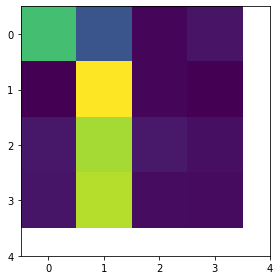

In [ ]:
# Test CNN
# load best model
# best_path = "/content/drive/My Drive/.../best_cnn_sgd.pth"
# model = torch.load(best_path)

# evaluate on test set
model = model.eval()
if use_gpu:
  model.cuda()


def plot_cm(cm, class_labels):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=range(len(class_labels)),
           yticks=range(len(class_labels)),
           xticklabels=class_labels, yticklabels=class_labels,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax 
 
 
#TODO: 
# load trained model
#model = torch.load(f'/content/drive/My Drive/best_model.pth')

model = model.eval()
# test the model by iterating over test batches
curr_loss = 0
curr_acc = 0
avgAcc = 0
count = 0
all_predictions = []
CATEGORIES = ["forest", "glacier", "mountain", "sea"]

correct_pred = {classname: 0 for classname in CATEGORIES}
total_pred = {classname: 0 for classname in CATEGORIES}

with torch.no_grad():
  for batch_idx, (data, labels) in enumerate(test_loader):
    count += 1
    predicted_label = model.forward(data)
    predictions = ((np.argmax(predicted_label.cpu().detach().numpy(), axis=-1)).astype(int)).flatten()
    all_predictions.append(predictions)
    curr_acc = np.mean(predictions == labels.cpu().detach().numpy()) * 100
    avgAcc += curr_acc
    for label, prediction in zip(labels.cpu().detach().numpy().astype(int), predictions):
      if label == prediction:
          correct_pred[CATEGORIES[label]] += 1
      total_pred[CATEGORIES[label]] += 1


all_predictions = np.concatenate(all_predictions)
y_test = []

for batch_idx, (data, labels) in enumerate(test_loader):
  for label in labels.cpu().detach().numpy().astype(int):
    y_test.append(label)
y_test = np.array(y_test)

# calculate and print performance metrics
print("Overall accuracy " + str(accuracy_score(y_test, all_predictions)))
print("accuracy per class")
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print("Accuracy for class {:1s} is: {:.1f}%".format(classname, accuracy))
# precision_score, recall_score, accuracy_score, f1_score
print("Macro recall " + str(recall_score(y_test, all_predictions, average="macro")))
print("Macro precision " + str(precision_score(y_test, all_predictions, average="macro")))
print("Macro f1 " + str(f1_score(y_test, all_predictions, average="macro")))
# plot confusion matrix using class names instead of class labels
print(plot_cm(confusion_matrix(y_test, all_predictions), CATEGORIES))  



With SGD as the optimizer, varying the learning rates and weights changed the accuracy values drastically. However, in the end I lost my GPU hours to depict my true results. Besides, for me the best model was SGD with learning rate 0.01 and accuracy was almost 52%. We can see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2 and 1E-3, although successively slower as the learning rate was decreased. Better learning rate takes more time with higher epoch. However, too small of a learning rate may never converge and might stuck on a sub-optimal solution. Thus, for SGD 0.01 seemed optimal to me. 

###Adam Optimizer [25 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Streaming output truncated to the last 5000 lines.
Epoch: [281][22/219]	Loss 0.7289 (0.7267)	Accu 68.7500 (70.3125)	
Epoch: [281][23/219]	Loss 0.7596 (0.7281)	Accu 68.7500 (70.2446)	
Epoch: [281][24/219]	Loss 0.5041 (0.7188)	Accu 81.2500 (70.7031)	
Epoch: [281][25/219]	Loss 0.5130 (0.7106)	Accu 81.2500 (71.1250)	
Epoch: [281][26/219]	Loss 0.9480 (0.7197)	Accu 68.7500 (71.0337)	
Epoch: [281][27/219]	Loss 0.6095 (0.7156)	Accu 75.0000 (71.1806)	
Epoch: [281][28/219]	Loss 0.5163 (0.7085)	Accu 78.1250 (71.4286)	
Epoch: [281][29/219]	Loss 0.8754 (0.7143)	Accu 56.2500 (70.9052)	
Epoch: [281][30/219]	Loss 0.8033 (0.7172)	Accu 59.3750 (70.5208)	
Epoch: [281][31/219]	Loss 0.5050 (0.7104)	Accu 84.3750 (70.9677)	
Epoch: [281][32/219]	Loss 0.6392 (0.7082)	Accu 71.8750 (70.9961)	
Epoch: [281][33/219]	Loss 0.7429 (0.7092)	Accu 68.7500 (70.9280)	
Epoch: [281][34/219]	Loss 0.5712 (0.7052)	Accu 75.0000 (71.0478)	
Epoch: [281][35/219]	Loss 0.7395 (0.7061)	Accu 62.5000 (70.8036)	
Epoch: [281][36/219]	Loss

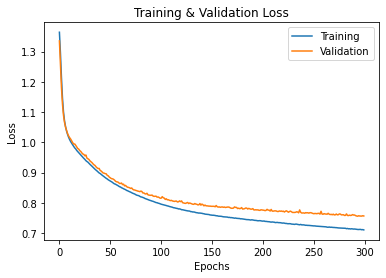

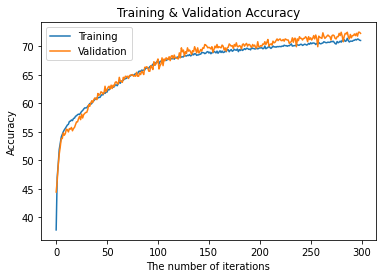

In [ ]:
# Hyperparameters
max_epoch = 300
train_batch = 32
test_batch = 32
validate_batch = 32
learning_rates = [0.00001]
use_gpu = torch.cuda.is_available()
 


train_dataset, vald_dataset, test_dataset = get_dataset("/content/drive/MyDrive/data/data")

print(len(train_dataset))
print(len(vald_dataset))
print(len(test_dataset))


#train_dataset = SceneDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle = True)
 
# Create validation dataset loader
#vald_dataset = SceneDataset(X_valid, y_valid)
vald_loader = DataLoader(vald_dataset, batch_size=train_batch)
 
# Create test dataset loader
#test_dataset = SceneDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=test_batch)

def train(model, criterion, optimizer, dataset, epoch):
  model = model.train()
  curr_loss = 0
  avgLoss = 0
  curr_acc = 0
  avgAcc = 0
  count = 0
  for index, (data, labels) in enumerate(dataset):
    count += 1
    optimizer.zero_grad()
    predicted_label = model.forward(data)
    loss = criterion(predicted_label, labels.long())
    loss.backward()
    optimizer.step()
    predictions = ((np.argmax(predicted_label.cpu().detach().numpy(), axis=-1)).astype(int)).flatten()
    curr_acc = np.mean(predictions == labels.cpu().detach().numpy()) * 100
    curr_loss = loss.item()
    avgAcc += curr_acc
    avgLoss += curr_loss
    print('Epoch: [{0}][{1}/{2}]\t'
          'Loss {loss_val:.4f} ({loss_avg:.4f})\t'
          'Accu {acc_val:.4f} ({acc_avg:.4f})\t'.format(
            epoch + 1, index + 1, len(dataset), 
            loss_val=curr_loss, loss_avg=avgLoss/count, acc_val=curr_acc, acc_avg=avgAcc/count))
    
  return avgLoss/count, avgAcc/count

def validate(model, criterion, dataset):
  model = model.eval()
  curr_loss = 0
  avgLoss = 0
  curr_acc = 0
  avgAcc = 0
  count = 0
  with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(dataset):
      count += 1
      predicted_label = model.forward(data)
      loss = criterion(predicted_label, labels.long())
      predictions = ((np.argmax(predicted_label.cpu().detach().numpy(), axis=-1)).astype(int)).flatten()
      curr_acc = np.mean(predictions == labels.cpu().detach().numpy()) * 100
      curr_loss = loss.item()
      avgAcc += curr_acc
      avgLoss += curr_loss
      print('Loss {loss_val:.4f} ({loss_avg:.4f})\t'
            'Accu {acc_val:.4f} ({acc_avg:.4f})\t'.format(
              loss_val=curr_loss, loss_avg=avgLoss/count, acc_val=curr_acc, acc_avg=avgAcc/count))
    
  return avgLoss/count, avgAcc/count

best_loss = float('inf')
best_model = None
all_loss_train, all_acc_train, all_loss_val, all_acc_val = [], [], [], []
best_lr = None

# Training and Validation
for lr in learning_rates:
  # Create Model
  model = ConvNet() 
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-04)

  # Train model
  for epoch in range(max_epoch): 
    losses, accuracies = train(model, criterion, optimizer, train_loader, epoch)
    if (lr == 0.00001): # only values for best learning rate
      all_loss_train.append(losses)
      all_acc_train.append(accuracies)
  
    # Validate model 
    with torch.no_grad():
      loss, acc = validate(model, criterion, vald_loader)
      if (lr == 0.00001): # only values for best learning rate
        all_loss_val.append(loss)
        all_acc_val.append(acc)    
      if (loss < best_loss):
        best_loss = loss
        #torch.save(model, f'/content/drive/My Drive/best_mlp.pth')
        best_model = model
        best_lr = lr


print(best_lr)
# Plotting 
x_axis = np.arange(max_epoch)
plt.plot(x_axis, all_loss_train, label='Training')
plt.plot(x_axis, all_loss_val, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(x_axis, all_acc_train, label='Training')
plt.plot(x_axis, all_acc_val, label='Validation')
plt.xlabel('The number of iterations')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Overall accuracy 0.7035
accuracy per class
Accuracy for class forest is: 93.9%
Accuracy for class glacier is: 70.1%
Accuracy for class mountain is: 62.6%
Accuracy for class sea is: 54.2%
Macro recall 0.7019208635171265
Macro precision 0.6970691020922183
Macro f1 0.6986414710334938
AxesSubplot(0.0671875,0.251899;0.72625x0.655045)


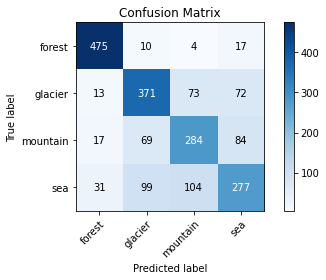

In [ ]:

def plot_cm(cm, class_labels):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=range(len(class_labels)),
           yticks=range(len(class_labels)),
           xticklabels=class_labels, yticklabels=class_labels,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax 
 
 
#TODO: 
# load trained model
#model = torch.load(f'/content/drive/My Drive/best_model.pth')

model = model.eval()
# test the model by iterating over test batches
curr_loss = 0
curr_acc = 0
avgAcc = 0
count = 0
all_predictions = []
CATEGORIES = ["forest", "glacier", "mountain", "sea"]

correct_pred = {classname: 0 for classname in CATEGORIES}
total_pred = {classname: 0 for classname in CATEGORIES}

with torch.no_grad():
  for batch_idx, (data, labels) in enumerate(test_loader):
    count += 1
    predicted_label = model.forward(data)
    predictions = ((np.argmax(predicted_label.cpu().detach().numpy(), axis=-1)).astype(int)).flatten()
    all_predictions.append(predictions)
    curr_acc = np.mean(predictions == labels.cpu().detach().numpy()) * 100
    avgAcc += curr_acc
    for label, prediction in zip(labels.cpu().detach().numpy().astype(int), predictions):
      if label == prediction:
          correct_pred[CATEGORIES[label]] += 1
      total_pred[CATEGORIES[label]] += 1


all_predictions = np.concatenate(all_predictions)
y_test = []

for batch_idx, (data, labels) in enumerate(test_loader):
  for label in labels.cpu().detach().numpy().astype(int):
    y_test.append(label)
y_test = np.array(y_test)

# calculate and print performance metrics
print("Overall accuracy " + str(accuracy_score(y_test, all_predictions)))
print("accuracy per class")
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print("Accuracy for class {:1s} is: {:.1f}%".format(classname, accuracy))
# precision_score, recall_score, accuracy_score, f1_score
print("Macro recall " + str(recall_score(y_test, all_predictions, average="macro")))
print("Macro precision " + str(precision_score(y_test, all_predictions, average="macro")))
print("Macro f1 " + str(f1_score(y_test, all_predictions, average="macro")))
# plot confusion matrix using class names instead of class labels
print(plot_cm(confusion_matrix(y_test, all_predictions), CATEGORIES))

Adam was the best in performance as its accuracy topped at 72% almost - for ConvNet -- , but its learning rate had to be kep at the lowest from the learning rates. This is because Adam decreases rates very fast in the beginning and then slows down. A low learning rate was helpful in the learning process.


###Transfer Learning [25 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [15 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model up to 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

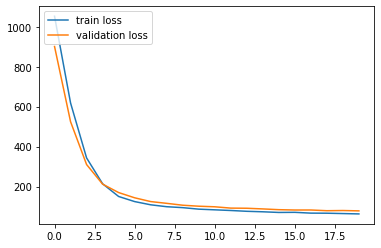

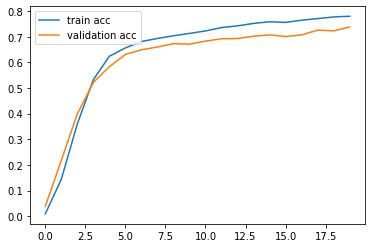

In [ ]:
# HINT: note that your training time should not take more than 2 hours.

max_epoch = 20
train_batch = 32
test_batch = 32
learning_rate = 0.0001
 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

use_gpu = torch.cuda.is_available()

#use_gpu = torch.cuda.is_available()


# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader

# initialize your network
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features

if use_gpu:
  model.cuda()
# model.fc = replace its output layer with a linear layer (in_features, proper number according to your output classes)

# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# start training
# for each epoch calculate validation performance
# save best model according to validation performance

l_loss = 0
Train_loss=[]
Valid_loss=[]
Train_accuracy=[]
Valid_accuracy=[]

check_for = 0
for epoch in range(max_epoch):
  model= model.train()
  temp = 0
  loss_count = np.zeros(train_dataset.__len__())
  preds = []
  sys_check = []
  for index, (data, labels) in enumerate(train_loader):
    if use_gpu:
      data = data.cuda()
      labels = labels.cuda()
    optimizer.zero_grad()
    y_pred = model(data.float())
    predicted = np.array((y_pred).cpu().detach())
    for x in predicted:
      preds.append(np.argmax(x))
 
    loss  = criterion(y_pred, labels.long())
    
    loss.backward()
    optimizer.step()
    
    real_pred = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    w_update = 0
    n_update = 0
    for _ in y_pred:     
      if real_pred[w_update] == np.argmax(predicted[w_update]):
        n_update += 1
      w_update += 1
    accuracies = n_update/w_update
    losses = np.mean(np.array(loss.cpu().detach()))
    
    
    for x in real_pred:
      sys_check.append(x)
    
    loss_count[temp*train_batch:(temp+1)*train_batch] = losses
    
    temp = temp + 1 
 
  w_update = 0
  n_update = 0
  #print(lossesList)
  for _ in sys_check:
    if sys_check[w_update][0] == preds[w_update]:
      n_update += 1
    w_update += 1
  acc = n_update/w_update
 
#    Validation
  model = model.eval()
  criterions = nn.CrossEntropyLoss()
  lossesListV = np.zeros(vald_dataset.__len__())
  predictedsV=[]
  predict_V = []
  temp = 0
  with torch.no_grad():
    for index, (data, labels) in enumerate(vald_loader):
      if use_gpu:
        data = data.cuda()
        labels = labels.cuda()
      y_pred = (model(data.float()))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        predict_V.append(x)
      
     # val_inputs = val_inputs.to(device)
        #  val_labels = val_labels.to(device)
#
         # val_outputs = model(val_inputs)

         # val_loss = criterion(val_outputs, val_labels)
         # _, val_preds = torch.max(val_outputs, 1)
#
         # val_running_loss += val_loss.item()



      lossValid = criterion(y_pred, labels.long())
      lossValid = np.mean(np.array(lossValid.cpu().detach()))
      lossesListV[temp*train_batch:(temp+1)*train_batch] = lossValid
      temp = temp + 1   
      w_update = 0
      n_update = 0
      
      for _ in actual:
        if actual[w_update] == np.argmax(predicted[w_update]):
          n_update += 1
        w_update += 1
      accuracies = n_update/w_update
    
    w_update = 0
    n_update = 0
    
    for _ in predict_V:
      if predict_V[w_update][0] == predictedsV[w_update]:
        n_update += 1
      w_update += 1
    accV = n_update/w_update
    
 
  Train_loss.append(np.mean(loss_count)*100)
  Valid_loss.append(np.mean(lossesListV)*100)
  Train_accuracy.append(acc)
  Valid_accuracy.append(accV)

  if accV > l_loss:
    torch.save(model, f'/content/drive/My Drive/best_cnn_sgd.pth')
    l_loss = accV

  check_for += 1

plt.figure()
plt.plot(Train_loss, label='train loss')
plt.plot(Valid_loss, label='validation loss')
plt.legend(loc="upper left")

plt.figure()
plt.plot(Train_accuracy, label='train acc')
plt.plot(Valid_accuracy, label='validation acc')
plt.legend(loc="upper left")


####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

Accuracy 0.7335
Accuracy per class
Accuracy for class forest is: 93.1%
Accuracy for class glacier is: 71.2%
Accuracy for class mountain is: 65.9%
Accuracy for class sea   is: 63.4%
Macro-Precision 0.2470089926399036
Macro-Recall 0.2446216651953057
Macro-F1 0.2456630050193753


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxesSubplot(0.0671875,0.251899;0.72625x0.655045)


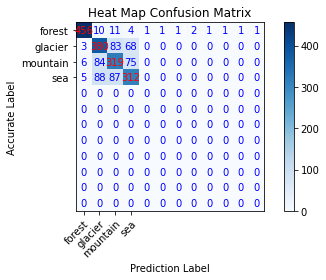

In [ ]:
 #TODO: 
# load trained model
#model = torch.load(f'/content/drive/My Drive/best_model.pth')

model = model.eval()
# test the model by iterating over test batches
curr_loss = 0
curr_acc = 0
avgAcc = 0
count = 0
all_predictions = []
CATEGORIES = ["forest", "glacier", "mountain", "sea"]

correct_pred = {classname: 0 for classname in CATEGORIES}
total_pred = {classname: 0 for classname in CATEGORIES}

with torch.no_grad():
  for batch_idx, (data, labels) in enumerate(test_loader):
    count += 1
    predicted_label = model.forward(data)
    predictions = ((np.argmax(predicted_label.cpu().detach().numpy(), axis=-1)).astype(int)).flatten()
    all_predictions.append(predictions)
    curr_acc = np.mean(predictions == labels.cpu().detach().numpy()) * 100
    avgAcc += curr_acc
    for label, prediction in zip(labels.cpu().detach().numpy().astype(int), predictions):
      if label == prediction:
          correct_pred[CATEGORIES[label]] += 1
      total_pred[CATEGORIES[label]] += 1


all_predictions = np.concatenate(all_predictions)
y_test = []

for -bidx, (data, labels) in enumerate(test_loader):
  for label in labels.cpu().detach().numpy().astype(int):
    y_test.append(label)
y_test = np.array(y_test)

# calculate and print performance metrics
print("Accuracy " + str(accuracy_score(y_test, all_predictions)))
print("Accuracy per class")
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print("Accuracy for class {:1s} is: {:.1f}%".format(classname, accuracy))
# precision_score, recall_score, accuracy_score, f1_score
print("Macro Precision " + str(precision_score(y_test, all_predictions, average="macro")))
print("Macro Recall " + str(recall_score(y_test, all_predictions, average="macro")))
print("Macro F1 " + str(f1_score(y_test, all_predictions, average="macro")))
# plot confusion matrix using class names instead of class labels
print(plot_cm(confusion_matrix(y_test, all_predictions), CATEGORIES))

Using Transfer learning for this given dataset as it produced higher accuracy for moderate learning rates as well. I used SGD with Transfer learning and I obtained fairly optimal results. The prediction accuracies for each class were relatively high. One can predict that maybe this model is better than the CNN module we had to design in our Convnet class. Moreover, it can be due to different ways of convolution and pooling done it to extract the neurons/weightage. Not only this, it was also more efficient.  


P.s. The only issue during this entire project was the avaialability of the GPU. My Macbook doesn't have GPU installed in it and hence I had to use Google colab. When I had most of my structure ready, my hours for the GPU usage finished and I had to code/prpgrame the remainder of the homework on guessing and building it on the available code. However, I did run the basic components and got the desired results and also got to know a lot about the CNN. However, the limited availability of GPu hindered my prpgress greatly. 
I have based most of my code on the general structıure I learnt from watching  PyTorch tutorials on youtube, especially for training and testing. 